# Ridge And Lasso Regression

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV




In [ ]:
df = pd.read_excel('"D:\Supervised Machine Learning lab (SMLL)\4\Practice dataset.xlsx"')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [84]:
df = df.iloc[ : , 1: ]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


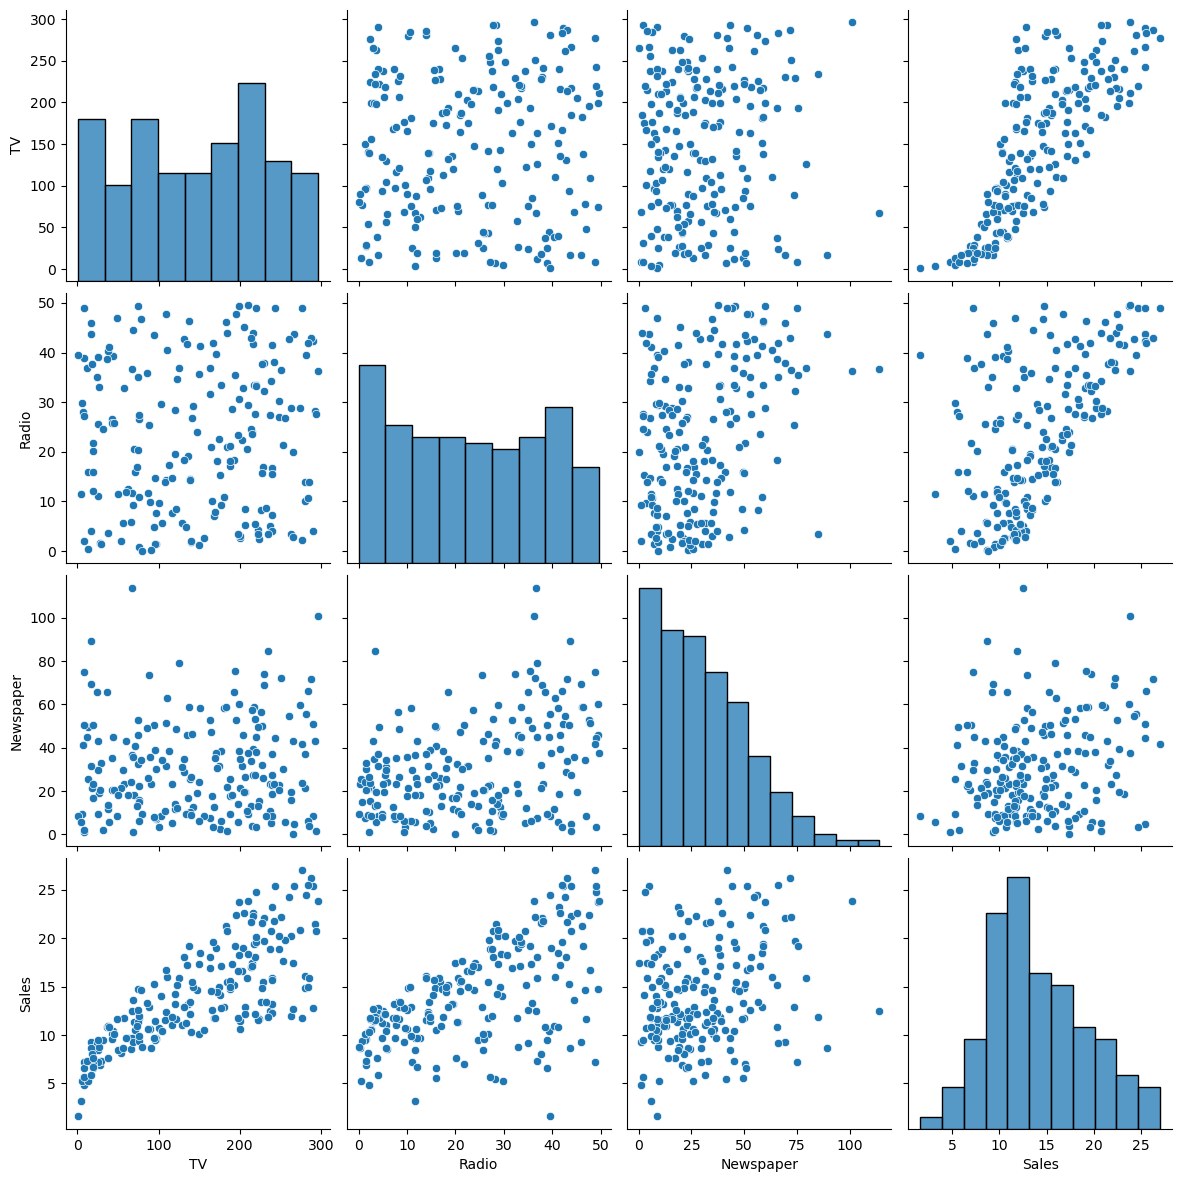

In [85]:
sns.pairplot(data = df , height=3)

In [86]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [87]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [88]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [89]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [91]:
X = df.iloc[:,:-1]
calc_vif(X)

,VIF
0,2.486772
1,3.285462
2,3.055245


In [92]:
alpha_values = np.linspace(-3, 3, 10)
print(alpha_values)

[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]


In [93]:
from sklearn.linear_model import Ridge
# Ridge Regression with hyperparameter tuning
ridge = Ridge()
# Define the hyperparameter grid for alpha values (regularization strength)
alpha_values = { 'alpha': np.logspace(-3, 3, 10)} # 10 values from 10^-3 to 10^3

ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train) # Train Ridge regression model with cross-validation

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': np.logspace(-3, 3, 10)}, scoring='neg_mean_squared_error') 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [94]:
# Best Ridge Model 
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test) # Predictions on test data

In [95]:
# Ridge RMSE
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test,y_pred_ridge)
print("Best ridge Alpha :",ridge_cv.best_params_['alpha'])
print("RMSE :", ridge_rmse)
print("R2 :",r2_ridge)

Best ridge Alpha : 0.001
RMSE : 1.7815996608176399
R2 : 0.8994380241817195


In [96]:
from sklearn.linear_model import Lasso
# Lasso Regression with hyperparameter tuning
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
# Define the hyperparameter grid for alpha values (regularization strength)
lasso_cv.fit(X_train, y_train) # Train Lasso regression model with cross-validation
GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': np.logspace(-3, -3, 10)}, scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001])},
             scoring='neg_mean_squared_error')

In [97]:
# Best Lasso Model
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test) # Predictions on test data


In [98]:
# Lasso RMSE
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test,y_pred_lasso)
print("Best Lasso Alpha :",lasso_cv.best_params_['alpha'])
print("RMSE :", lasso_rmse)
print("R2 :",r2_lasso)


Best Lasso Alpha : 2.154434690031882
RMSE : 1.7677097690307533
R2 : 0.9009999351697155


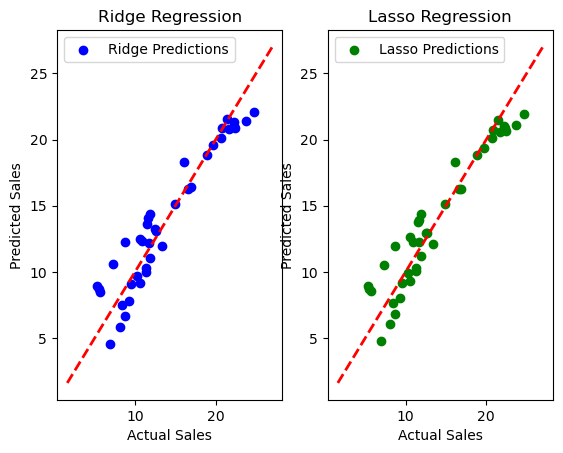

In [99]:
# Ridge Regression Plot
plt.subplot(1,2,1)
plt.scatter(y_test,y_pred_ridge,color='blue',label="Ridge Predictions")
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression')
plt.legend()

# Lasso Regression Plot
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_lasso,color='green',label="Lasso Predictions")
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Lasso Regression')
plt.legend()
plt.show()

In [100]:
# Print the coefficients of the lasso with feature names
print("Lasso Coefficients :")
for feature, coef in zip(x.columns, best_lasso.coef_):
    print(f"feature : {feature}, Coefficient , {coef} ")
print("Ridge Coefficients :")
for feature, coef in zip(x.columns, best_lasso.coef_):
    print(f"feature : {feature}, Coefficient , {coef} ")



Lasso Coefficients :
feature : TV, Coefficient , 0.044516937884577404 
feature : Radio, Coefficient , 0.1808414992503233 
feature : Newspaper, Coefficient , 0.0 
Ridge Coefficients :
feature : TV, Coefficient , 0.044516937884577404 
feature : Radio, Coefficient , 0.1808414992503233 
feature : Newspaper, Coefficient , 0.0 


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)



GridSearchCV(cv=5, estimator=elastic_net_cv(), param_grid={'alpha': np.logspace(-3, -3, 10)}, scoring='neg_mean_squared_error')
elastic_net_cv = GridSearchCV(elastic_net, alpha_values, cv=5, scoring='neg_mean_squared_error')
elastic_net.fit(X_train, y_train) # Train Elastic Net regression model with cross-validation

# Make predictions
y_pred_elastic = elastic_net.predict(X_test)

# Evaluate the model
elastic_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic))
r2_elastic = r2_score(y_test, y_pred_elastic)

print("Elastic Net RMSE:", elastic_rmse)
print("Elastic Net R2:", r2_elastic)

# Plot the results
plt.figure(figsize=(12, 6))

# Ridge Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_ridge, color='blue', label="Ridge Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression')
plt.legend()

# Lasso Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, color='green', label="Lasso Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Lasso Regression')
plt.legend()

# Elastic Net Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_elastic, color='purple', label="Elastic Net Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Elastic Net Regression')
plt.legend()

plt.tight_layout()
plt.show()

TypeError: 'GridSearchCV' object is not callable

In [ ]:
# Print the coefficients of the elastic with feature names
print("Elastic Net Coefficients:")
for feature, coef in zip(x.columns, elastic_net.coef_):
    print(f"feature : {feature}, Coefficient , {coef} ")